<a href="https://colab.research.google.com/github/wakamoia/tareitas-clase-IA-y-RN/blob/main/Actividades/A4_Entrenamiento_de_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PATRICIA SOFIA MOYA TOBIAS**

**IMTC 1954922  IMTC N1**

A4: Entrenamiento de Red Neuronal Artificial simple.

*Lo primero que tenemos que hacer es importar las librerias de tensorflow*

In [18]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


*Luego hay que hacer la normalización para que vaya identificando las diferentes formas de escribir un número*



In [19]:
#Normalización
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
class_names = ['cero', 'uno', 'dos', 'tres' ,'cuatro' ,'cinco','seis','siete', 'ocho',  'nueve']
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
#Rango de la gama de color que llega hasta 255
train_images = train_images / 255.0

test_images = test_images / 255.0

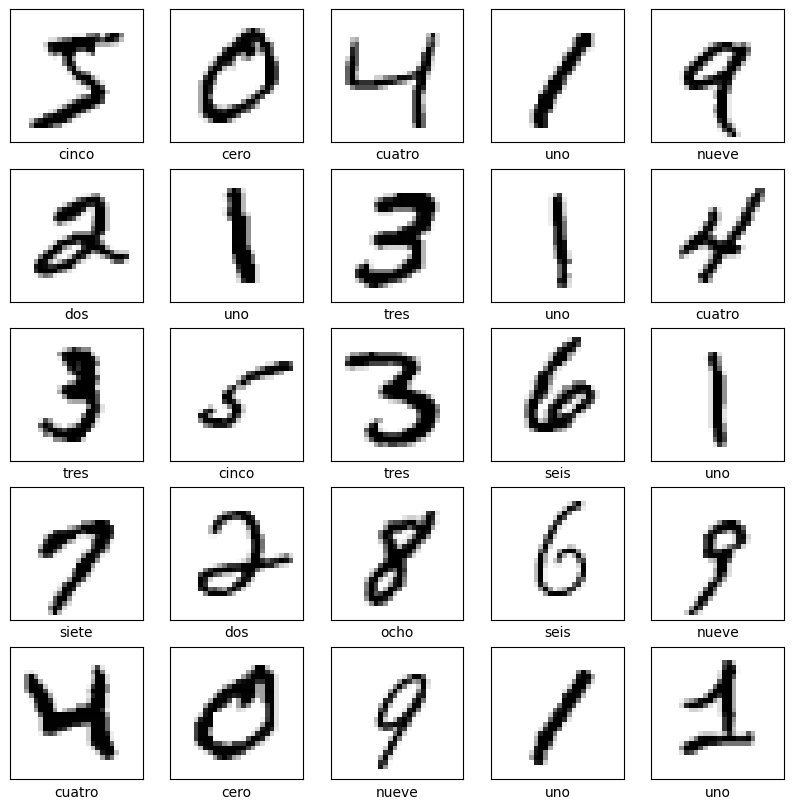

In [21]:
#Muestra de 25 números para que los relacione con su nombre
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
#Construir un modelo para poder configurar las capas 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

*Entrenamiento*

In [27]:
#Aqui ya se empieza a entrenar a la red
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0777 - accuracy: 0.9757
Epoch 2/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0572 - accuracy: 0.9825
Epoch 3/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 4/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9896
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0228 - accuracy: 0.9932
Epoch 7/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0174 - accuracy: 0.9949
Epoch 8/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 9/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 10/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0

In [28]:
#Aqui podemos ver que tenemos una precision del 73% 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0891 - accuracy: 0.9792 - 839ms/epoch - 3ms/step

Test accuracy: 0.979200005531311


In [29]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

In [31]:
#Se le dice a la red que haga una predicción para ver el entrenamiento previo en acción
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

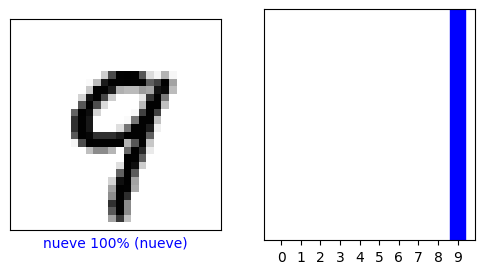

In [32]:
#Ejemplo 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

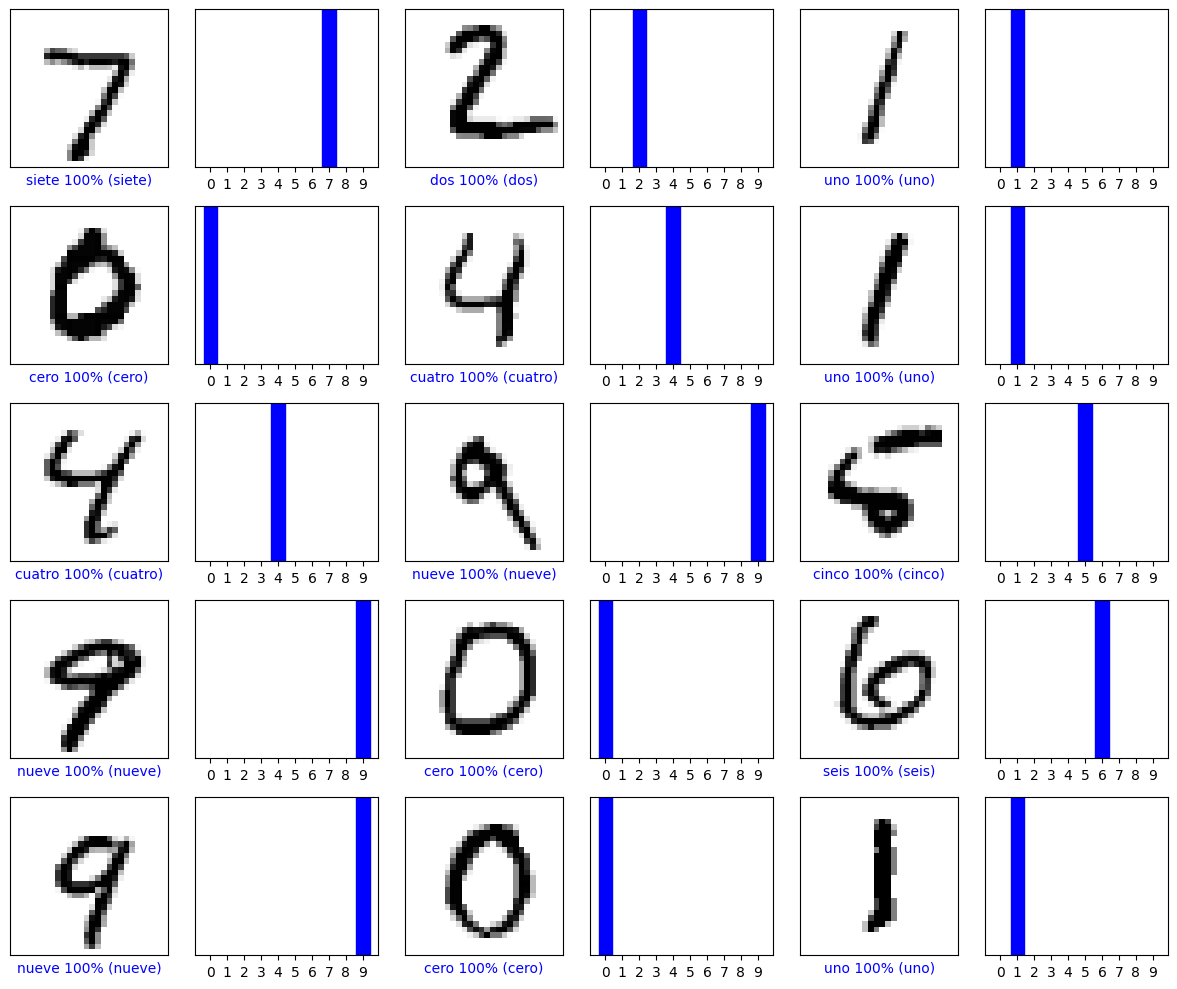

In [33]:
# Aquí se muestran algunas pruebas del aprendizaje de nuestra red, ahora sale con un 97% de presición

# El color azul es la predicción correcta mientras que la de color rojo es la incorrecta
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()